In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("occupancy_data/datatraining.txt")

# Stats

In [3]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [4]:
df.median()

Temperature       20.390000
Humidity          26.222500
Light              0.000000
CO2              453.500000
HumidityRatio      0.003801
Occupancy          0.000000
dtype: float64

In [62]:
# class composition
count_0 = 0
count_1 = 1
for value in df['Occupancy']:
    if value == 0:
        count_0 += 1
    elif value == 1:
        count_1 += 1
    else:
        print("Ahem") # just checking for anomalous values
print("Class 0: " +  str(count_0))
print("Percentage of whole ds: " + str(round(count_0/df.index.size*100, 2)) + "%")
print("Class 1: " + str(count_1))
print("Percentage of whole ds: " + str(round(count_1/df.index.size*100, 2)) + "%")

Class 0: 6414
Percentage of whole ds: 78.77%
Class 1: 1730
Percentage of whole ds: 21.25%


In [7]:
# attribute statistics broken down according to class label

for attribute in df.columns:
    print("\n"+ str(attribute).upper())
    print(df.groupby('Occupancy')[attribute].describe())
    print("\n")


DATE
          count unique                  top freq
Occupancy                                       
0          6414   6414  2015-02-09 23:31:00    1
1          1729   1729  2015-02-05 12:23:00    1



TEMPERATURE
            count       mean       std   min    25%      50%    75%    max
Occupancy                                                                 
0          6414.0  20.334931  0.909973  19.0  19.50  20.2000  20.89  23.10
1          1729.0  21.673192  0.622891  19.5  21.29  21.7675  22.10  23.18



HUMIDITY
            count       mean       std     min     25%      50%     75%  \
Occupancy                                                                 
0          6414.0  25.349685  5.294887  16.745  19.500  26.1875  30.000   
1          1729.0  27.147938  6.128497  18.600  21.236  26.4425  32.975   

               max  
Occupancy           
0          37.6900  
1          39.1175  



LIGHT
            count        mean        std   min    25%    50%     75%  \
Occup

In [8]:
#  il modo in cui viene tagliata la tabella la rende inutile
#  (ma sono le stesse informazioni della cella sopra)
df.groupby('Occupancy').describe()        

Temperature                                                    \
                count       mean       std   min    25%      50%    75%   
Occupancy                                                                 
0              6414.0  20.334931  0.909973  19.0  19.50  20.2000  20.89   
1              1729.0  21.673192  0.622891  19.5  21.29  21.7675  22.10   

                 Humidity             ...      CO2         HumidityRatio  \
             max    count       mean  ...      75%     max         count   
Occupancy                             ...                                  
0          23.10   6414.0  25.349685  ...   464.50  1784.5        6414.0   
1          23.18   1729.0  27.147938  ...  1131.25  2028.5        1729.0   

                                                                       \
               mean       std       min       25%       50%       75%   
Occupancy                                                               
0          0.003730  0.000753  0.002674  0.003004  0.003779  0.004274   
1          0.004355  0.001006  0.002715  0.003419  0.004347  0.005107   

                     
                max  
Occupancy            
0          0.006218  
1          0.006476  

[2 rows x 40 columns]

<b> Pairwise correlations </b>

In [68]:
#correlazioni
df.corr()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
Temperature,1.000000,-0.141759,0.649942,0.559894,0.151762,0.538220
Humidity,-0.141759,1.000000,0.037828,0.439023,0.955198,0.132964
Light,0.649942,0.037828,1.000000,0.664022,0.230420,0.907352
CO2,0.559894,0.439023,0.664022,1.000000,0.626556,0.712235
HumidityRatio,0.151762,0.955198,0.230420,0.626556,1.000000,0.300282
Occupancy,0.538220,0.132964,0.907352,0.712235,0.300282,1.000000


# Data visualisation

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt

(array([ 55., 126., 385., 627., 444., 153., 257., 251., 190., 253., 196.,
        382., 486., 317., 398., 136., 211., 125., 274., 215., 157., 389.,
        183., 181.,  96., 195., 165., 106., 126., 293., 185., 136.,  91.,
         80.,  67.,  50.,  25.,  43.,  50.,  44.]),
 array([19.    , 19.1045, 19.209 , 19.3135, 19.418 , 19.5225, 19.627 ,
        19.7315, 19.836 , 19.9405, 20.045 , 20.1495, 20.254 , 20.3585,
        20.463 , 20.5675, 20.672 , 20.7765, 20.881 , 20.9855, 21.09  ,
        21.1945, 21.299 , 21.4035, 21.508 , 21.6125, 21.717 , 21.8215,
        21.926 , 22.0305, 22.135 , 22.2395, 22.344 , 22.4485, 22.553 ,
        22.6575, 22.762 , 22.8665, 22.971 , 23.0755, 23.18  ]),
 <a list of 40 Patch objects>)

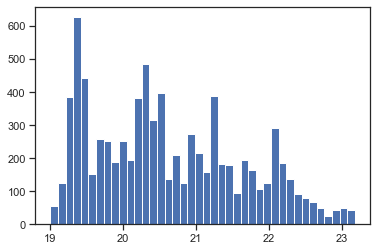

In [70]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df['Temperature'], bins = 40)

(array([5.647e+03, 1.690e+02, 8.800e+01, 8.200e+01, 5.300e+01, 4.000e+01,
        6.700e+01, 6.200e+01, 8.400e+01, 4.300e+01, 1.790e+02, 8.960e+02,
        4.930e+02, 1.470e+02, 6.200e+01, 1.100e+01, 6.000e+00, 7.000e+00,
        3.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00]),
 array([   0.        ,   38.65833333,   77.31666667,  115.975     ,
         154.63333333,  193.29166667,  231.95      ,  270.60833333,
         309.26666667,  347.925     ,  386.58333333,  425.24166667,
         463.9       ,  502.55833333,  541.21666667,  579.875     ,
         618.53333333,  657.19166667,  695.85      ,  734.50833333,
         773.16666667,  811.825     ,  850.48333333,  889.14166667,
         927.8       ,  966.45833333, 1005.11666667, 1043.775     ,
        1082.43333333, 112

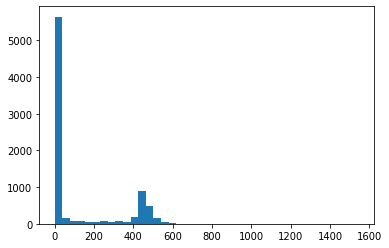

In [5]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df['Light'], bins = 40)

(array([4046., 1480.,  232.,  136.,  126.,  147.,  123.,   79.,  102.,
         196.,  166.,  145.,  100.,   68.,   65.,  137.,  154.,  117.,
          31.,   27.,   34.,   29.,   29.,   38.,   45.,   51.,   16.,
          11.,    7.,    6.,   11.,   10.,   16.,   13.,   16.,   19.,
          14.,   17.,   24.,   60.]),
 array([ 412.75   ,  453.14375,  493.5375 ,  533.93125,  574.325  ,
         614.71875,  655.1125 ,  695.50625,  735.9    ,  776.29375,
         816.6875 ,  857.08125,  897.475  ,  937.86875,  978.2625 ,
        1018.65625, 1059.05   , 1099.44375, 1139.8375 , 1180.23125,
        1220.625  , 1261.01875, 1301.4125 , 1341.80625, 1382.2    ,
        1422.59375, 1462.9875 , 1503.38125, 1543.775  , 1584.16875,
        1624.5625 , 1664.95625, 1705.35   , 1745.74375, 1786.1375 ,
        1826.53125, 1866.925  , 1907.31875, 1947.7125 , 1988.10625,
        2028.5    ]),
 <a list of 40 Patch objects>)

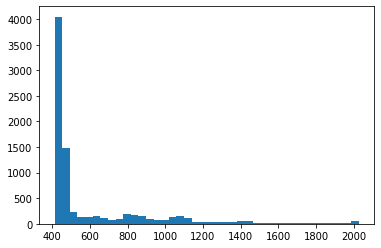

In [6]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df['CO2'], bins = 40)

(array([1942.,  858., 1397., 1050., 1315.,  828.,  344.,  163.,   78.,
         168.]),
 array([0.00267413, 0.00305432, 0.0034345 , 0.00381469, 0.00419488,
        0.00457507, 0.00495526, 0.00533545, 0.00571564, 0.00609582,
        0.00647601]),
 <a list of 10 Patch objects>)

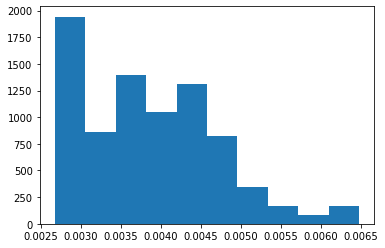

In [15]:
fig = plt.figure()
ax = plt.axes()

ax.hist(df['HumidityRatio'])

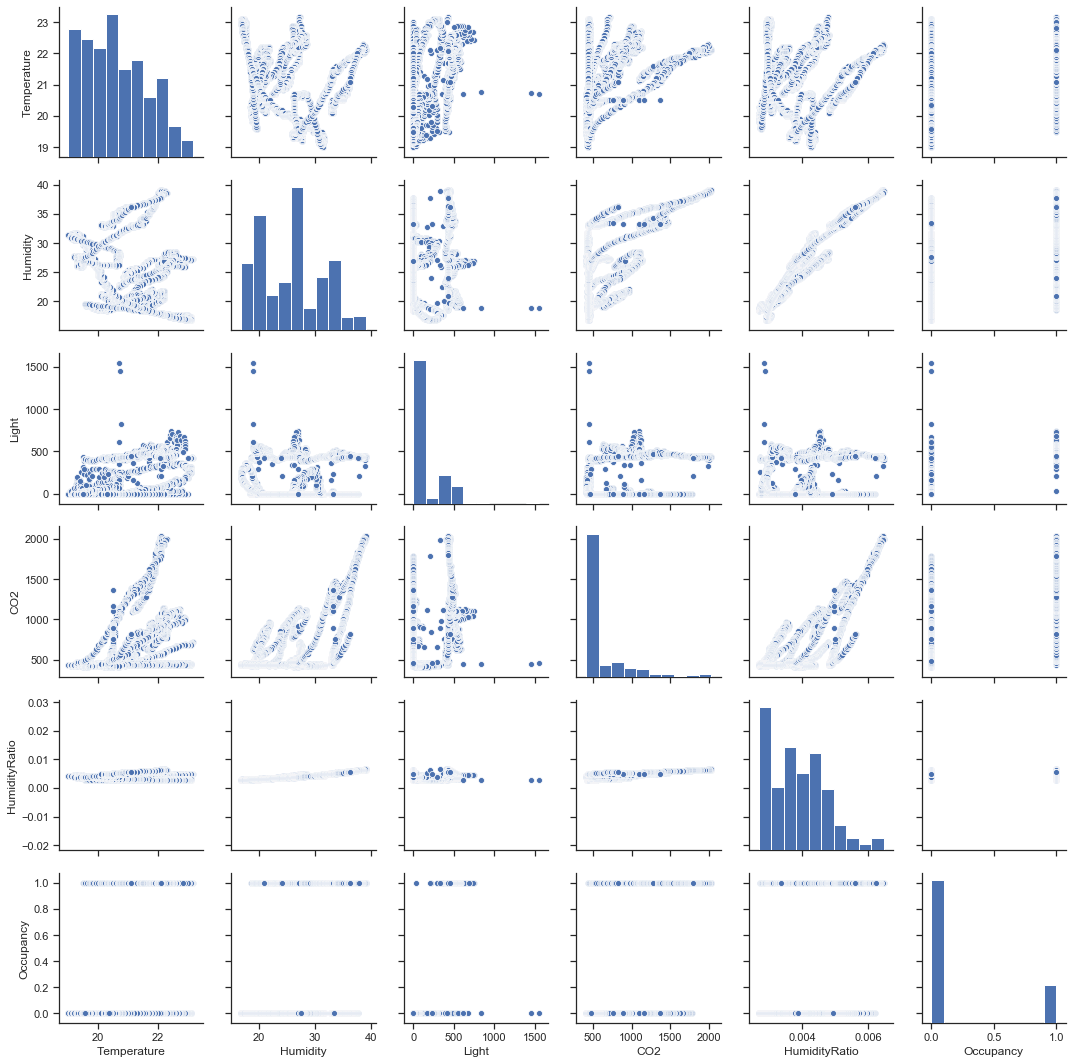

In [39]:
import seaborn as sns
sns.set(style="ticks")

sns.pairplot(df)

Text(0, 0.5, 'Count')

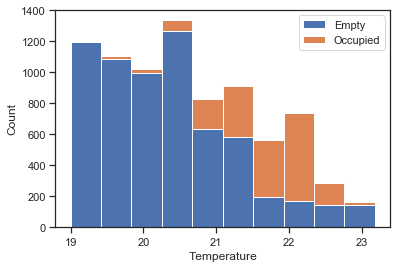

In [50]:
df1 = df[df['Occupancy'] == 0]['Temperature']
df2 = df[df['Occupancy'] == 1]['Temperature']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('Temperature')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

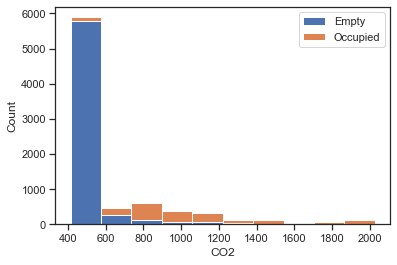

In [51]:
df1 = df[df['Occupancy'] == 0]['CO2']
df2 = df[df['Occupancy'] == 1]['CO2']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('CO2')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

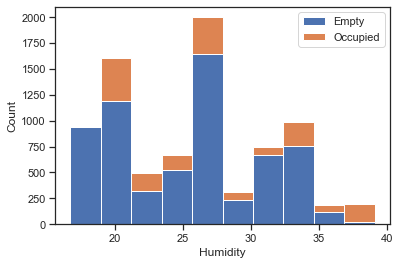

In [52]:
df1 = df[df['Occupancy'] == 0]['Humidity']
df2 = df[df['Occupancy'] == 1]['Humidity']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('Humidity')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

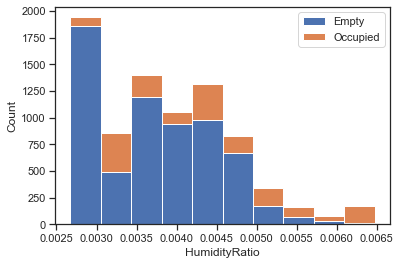

In [53]:
df1 = df[df['Occupancy'] == 0]['HumidityRatio']
df2 = df[df['Occupancy'] == 1]['HumidityRatio']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('HumidityRatio')
ax.set_ylabel('Count')

Text(0, 0.5, 'Count')

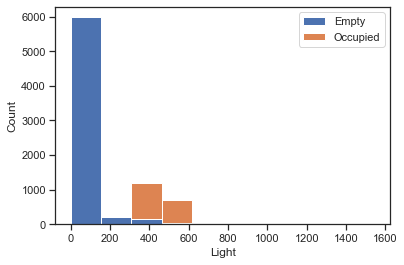

In [61]:
df1 = df[df['Occupancy'] == 0]['Light']
df2 = df[df['Occupancy'] == 1]['Light']

fig = plt.figure()
ax = plt.axes()

ax.hist([df1,df2], bins = 10, stacked= True)
ax.legend(('Empty', 'Occupied'), loc='best')
ax.set_xlabel('Light')
ax.set_ylabel('Count')

<b> Outliers </b>

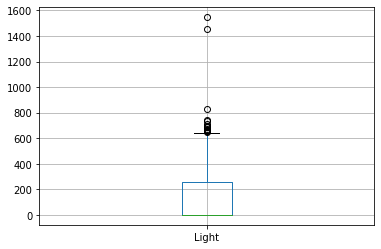

In [7]:
boxplot = df.boxplot(column= ['Light'])

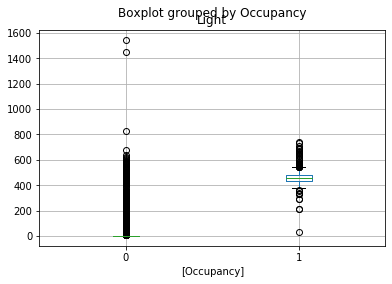

In [12]:
boxplot = df.boxplot(column= ['Light'], by = ['Occupancy'])

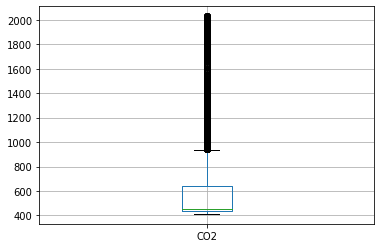

In [8]:
boxplot = df.boxplot(column= ['CO2'])

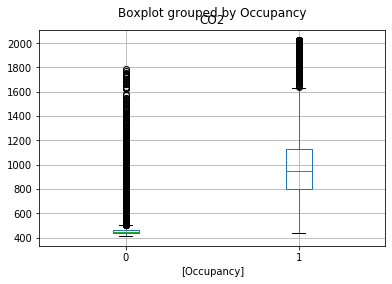

In [13]:
boxplot = df.boxplot(column= ['CO2'], by = ['Occupancy'])

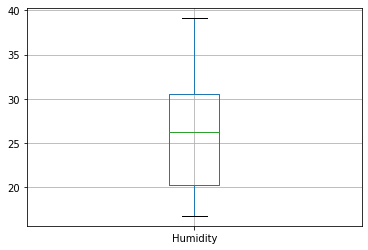

In [9]:
boxplot = df.boxplot(column= ['Humidity'])

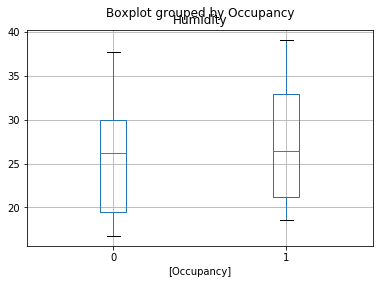

In [14]:
boxplot = df.boxplot(column= ['Humidity'], by = ['Occupancy'])

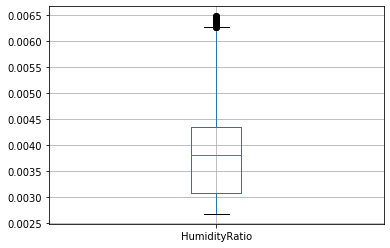

In [10]:
boxplot = df.boxplot(column= ['HumidityRatio'])

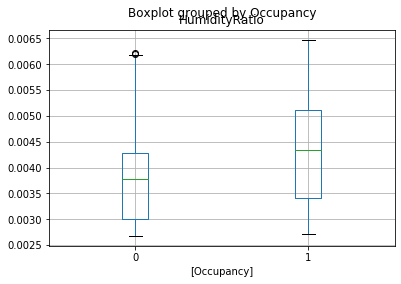

In [15]:
boxplot = df.boxplot(column= ['HumidityRatio'], by = ['Occupancy'])

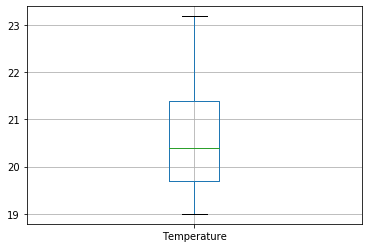

In [11]:
boxplot = df.boxplot(column= ['Temperature'])

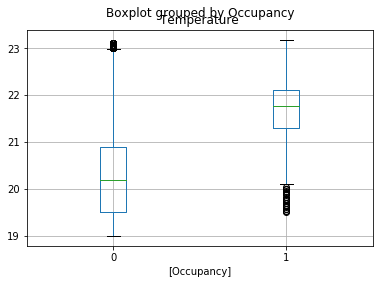

In [16]:
boxplot = df.boxplot(column= ['Temperature'], by = ['Occupancy'])

<b>Outlier analysis</b>

Light

In [41]:
# 

df[df['Occupancy']==0][df.Light>0]['Light'].count()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


1254

In [45]:
df[df['Occupancy']==0][df.Light==0]['Light'].count()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


5160

In [49]:
df[df['Occupancy']==0][df.Light>0].describe()


/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,1254.000000,1254.000000,1254.000000,1254.000000,1254.000000,1254.0
mean,20.830382,23.934166,142.071850,492.090843,0.003601,0.0
std,1.327359,5.395638,157.596762,162.002750,0.000651,0.0
min,19.050000,16.745000,4.666667,412.750000,0.002711,0.0
25%,19.527083,18.500000,24.000000,428.000000,0.002949,0.0
50%,20.700000,26.100000,68.000000,439.500000,0.003782,0.0
75%,22.150000,29.181250,253.250000,455.000000,0.004239,0.0
max,23.100000,33.400000,1546.333333,1243.333333,0.005283,0.0


In [52]:
df[df['Occupancy']==0][df.Light==0].describe()

/Applications/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,5160.000000,5160.000000,5160.0,5160.000000,5160.000000,5160.0
mean,20.214525,25.693689,0.0,489.890032,0.003761,0.0
std,0.726113,5.212894,0.0,150.642782,0.000772,0.0
min,19.000000,18.390000,0.0,420.333333,0.002674,0.0
25%,19.500000,20.050000,0.0,438.500000,0.003041,0.0
50%,20.200000,26.200000,0.0,447.333333,0.003772,0.0
75%,20.600000,30.100000,0.0,467.500000,0.004303,0.0
max,23.000000,37.690000,0.0,1784.500000,0.006218,0.0
